Michael Uftring   
Indiana University   
Network Science, Spring 2018   
Week#7 Assignment - Community Detection

# Detecting and Visualizing Communities

## American College Football

A network of American football games between Division IA colleges during regular season Fall 2000.

*M. Girvan and M. E. J. Newman, Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002)*

**1) Adjust the resolution of the community detection algorithm and get a sense of what communities are formed at different resolutions. Pick a resolution that makes sense to you. Give a physical interpretation of the communities and justify your choice for the resolution parameter.**

The *communities* in this network should equate to the NCAA Division 1A conferences as they existed in the Fall of 2000. Each college team belongs to just one conference, and the football teams generally play every other team in their conferecne once and "some" games against teams not in their conference. 

<u>Initial hypotheses</u> (before research): The network has 115 nodes, each conference has approx. 10 teams, so the goal would be to find between 9 and 13 communities.

<u>Research</u>:

According to the Wikipedia article [2000 NCAA Division I-A football season](https://en.wikipedia.org/wiki/2000_NCAA_Division_I-A_football_season), there were 12 conferences participating in College Football in 2000.

|   | Conference | # of Teams | Teams |
| - | ----------- | ---- | ---- |
| 1 | ACC | 9 | Florida State, Clemson, Georgia Tech, Virginia, North Carolina State, North Carolina, Maryland, Wake Forest, Duke |
| 2 | Big East | 8 | Miami (FL), Virginia Tech, Pitt, Syracuse, Boston College, West Virginia, Temple, Rutgers |
| 3 | Big Ten | 11 | Michigan, Northwestern, Purdue, Ohio State, Wisconsin, Minnesota, Penn State, Iowa, Illinois, Michigan State, Indiana |
| 4 | Big 12 | 12 | Nebraska, Kansas State, Iowa State, Colorado, Kansas, Missouri, Oklahoma, Texas, Texas A&M, Texas Tech, Oklahoma State, Baylor |
| 5 | Big West | 6 | Boise State, Utah State, Idaho, New Mexico State, North Texas, Arkansas State |
| 6 | Conference USA | 9 | Louisville, East Carolina, Cincinnati, Southern Mississippi, UAB, Tulane, Memphis, Houston, Army |
| 7 | Mid-American | 13 | Marshall, Ohio, Akron, Miami (OH), Bowling Green State, Buffalo, Kent State, Toledo, Western Michigan, Northern Illinois, Ball State, Eastern Michigan, Central Michigan |
| 8 | Mountain West | 8 | Colorado State, Air Force, Nevada-Las Vegas, Brigham Young, New Mexico, Utah, San Diego State, Wyoming |
| 9 | Pacific-10 | 10 | Oregon State, Washington, Oregon, Stanford, Arizona State, UCLA, Arizona, USC, Washington State, California |
| 10 | SEC | 12 | Florida, Georgia, South Carolina, Tennessee, Vanderbilt, Kentucky, Auburn, LSU, Mississippi State, Ole Miss, Arkansas, Alabama |
| 11 | WAC | 9 | Texas Christian, UTEP, Fresno State, San Jose State, Tulsa, Hawaii, Rice, SMU, Nevada |
| 12 | Independents | 8 | Notre Dame, South Florida, UCF, Middle Tennessee State, Connecticut, Louisiana Tech, Louisiana-Lafayette, Louisiana-Monroe, Navy |


<u>Revised hypothesis</u>: the goal is to detect 12 communities!

*Running Modularity*

| Randomize | Use Weights | Resolution | Modularity | Modularity <br> with Resolution | Communities |
| --- | --- | --- | --- | --- | --- |
| Yes | Off | 1.0 | 0.603 | 0.603 | 10 |
| Yes | Off | 0.5 | 0.603 | 0.255 | 12 |

The first run of **Modularity** with *Resolution* = 1.0 detected 10 communities. This was a good initial partitioning given the goal is to find 12 communities. Clearly the adjustment will be to reduce *Resolution* to detect more communities. The approach was b-tree like: half the *Resolution*, check the number of communities; if not quite "right" then half again up or down depending on results, and repeat.

The second run with *Resolution* = 0.5 detected 12 communities! We reached the goal, now on to visualization.

**2) Calculate the betweenness centrality for the nodes in the network and create a visualization which shows both the betweenness centrality and community membership (save this figure). How are betweenness centrality and community structure related?**

Layout:
- *Force Atlas 2*
- Tolerance: 1.0
- Approximation: 1.2
- Scaling: 7.5
- Gravity: 0.01
- Prevent Overlap: ON

Appearance:
- **Node Color**
- Partition: *Modularity Class*
- Custom Palette
- Number of Colors: 12
- Presets: Intense
- **Node Size**
- Ranking: *Betweenness Centrality*
- min size: 4.0
- max size: 12.0

The nodes with a high *Betweenness Centrality* measure tended to have the greatest number of links to nodes in other communities. In this context, it is showing the football teams which played the greatest number of out-of-conference games compared to the other teams in the same conference.

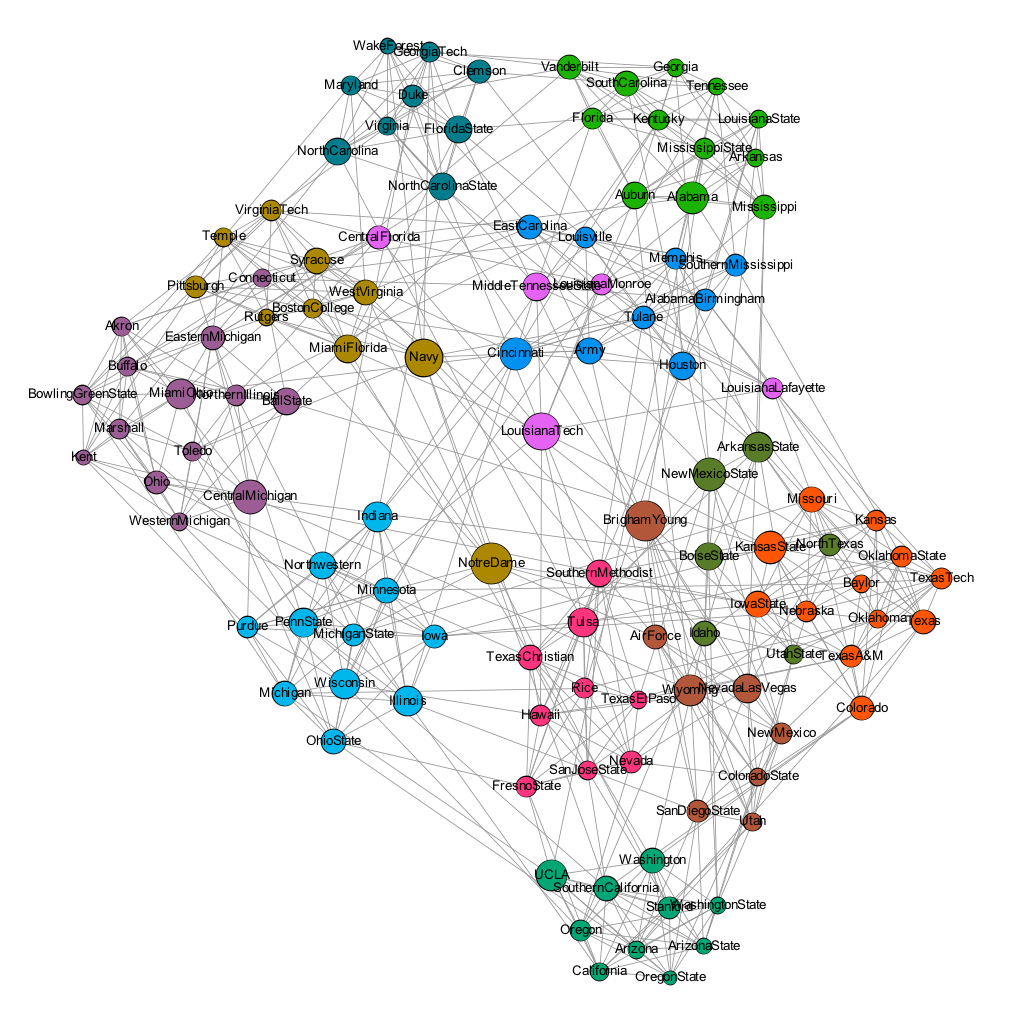

In [3]:
from IPython.display import Image
Image(filename="2000-ncaa-div1a-football.png")

## Zachary's Karate Club

A social network of friendships between 34 members of a karate club at a US university in the 1970s.

*W. W. Zachary, An information flow model for conflict and fission in small groups, Journal of Anthropological Research 33, 452-473 (1977).*

Note: I chose this network because I have wanted for a long time to take a look at it and analyze it. Further inspiration comes from discussion about this network in the reading for this week in both *Network Science*, (Barabasi) and *Networks, An Introduction* (Newman). Ideally I will be able to replicate the visualiztion presented by Barabasi in Figure 9.2(a).

**1) Find an appropriate resolution for detecting meaningful communities in the network and adjust the node layout accordingly. Does the network have a distinct community structure? If so, what do these communities represent and how do you think they were formed? If not, why do think that structure is lacking?**

<u>Initial hypothesis</u>: This network of 34 nodes and 78 links should partition into two communities. This "hypothesis" is based on the prior knowledge of what the data set represents: the split of a karate club membership, one side following the club president and one side following the instructor. Barabasi presents a visualization of this network which depicts four different communities; each "final" community in the split are made up of two of the presented communities. The ultimate goal of this exercise is to replicate Barabasi's results.

Communities presented by Barabasi:

|Community|Color|Number<br>of Nodes|Membership|
| --- | --- | --- | --- |
| 1   | white | 12 | 9, 10, 15, 16, 19, 21, 23, 27, 30, 31, 33, 34 |
| 2   | purple | 6 | 24, 25, 26, 28, 29, 32 |
| 3   | green | 11 | 1, 2, 3, 4, 8, 12, 13, 14, 18, 20, 22 |
| 4   | orange | 5 | 5, 6, 7, 11, 17 |

*Running Modularity*

| Randomize | Use Weights | Resolution | Modularity | Modularity <br> with Resolution | Communities | Community Sizes |
| --- | --- | --- | --- | --- | --- |
| Yes | Off | 1.0 | 0.415 | 0.415 | 4 | 11, 5, 4, 14 |
| Yes | Off | 2.0 | 0.372 | 1.244 | 2 | 16, 18 |
| Yes | Off | 1.5 | 0.402 | 0.812 | 3 | 5, 12, 17 |
| Yes | Off | 0.8 | 0.419 | 0.273 | 4 | 12, 5, 6, 11 |

The first run of **Modularity** with *Resolution* = 1.0 detected the goal: 4 communities. However, their sizes were not "correct" (at least according to the network as presented in *Barabasi*). Higher values of *Resolution* took away communities, though with *Resolution* = 2.0 there were 2 communities, which we know was the effect of the club's split. Reducing *Resolution* to 0.8 detected again four communities, this time with the target sizes! Time to visualize and see how it looks.

*Communities Detected*

Nodes were assigned to the following communities:
1. **white** (11): 9, 15, 16, 19, 21, 23, 27, 30, 31, 33, 34
2. **purple** (6): 24, 25, 26, 28, 29, 32
3. **green** (12): 1, 2, 3, 4, 8, 10, 12, 13, 14, 18, 20, 22
4. **orange** (5): 5, 6, 7, 11, 17

Comparing these results with Barabasi, we found: The purple and orange communities were identified perfectly. The white and green were very close as well, with node 10 identified as green instead of white. Overall, very good results.

**2) Pick another centrality measure and create (and save) a visualization that captures the community membership along with this centrality measure. Explain what relationships (or lack thereof) you see between the centrality measure you chose and community structure. Can you relate your explanations back to the real-world elements that make-up the network?**

Layout:
- *Yifan Hu*
- default settings
- *Noverlap*
- default settings

Appearance:
- **Node Color**
- Partition: *Modularity Class*
- Manually crafted Palette to match *Barabasi* presentation
- 4 colors: white, purple, green, orange
- **Node Size**
- Ranking: *Eigenvector Centrality*
- min size: 10.0
- max size: 15.0

*Eigenvenctor Centrality* was used because it emphasizes the center of the communities best, especially the combined communities (white + purple, green + orange). The impact of hubs can be clearly observed in the network communities, especially nodes 33, 34 and 1, 2, and 3.

> Eigenvector centrality emphasizes the degree of the neighbors. To have large eigenvector centrality, you need to have hubs as your neighbors, in addition to having a large degree.

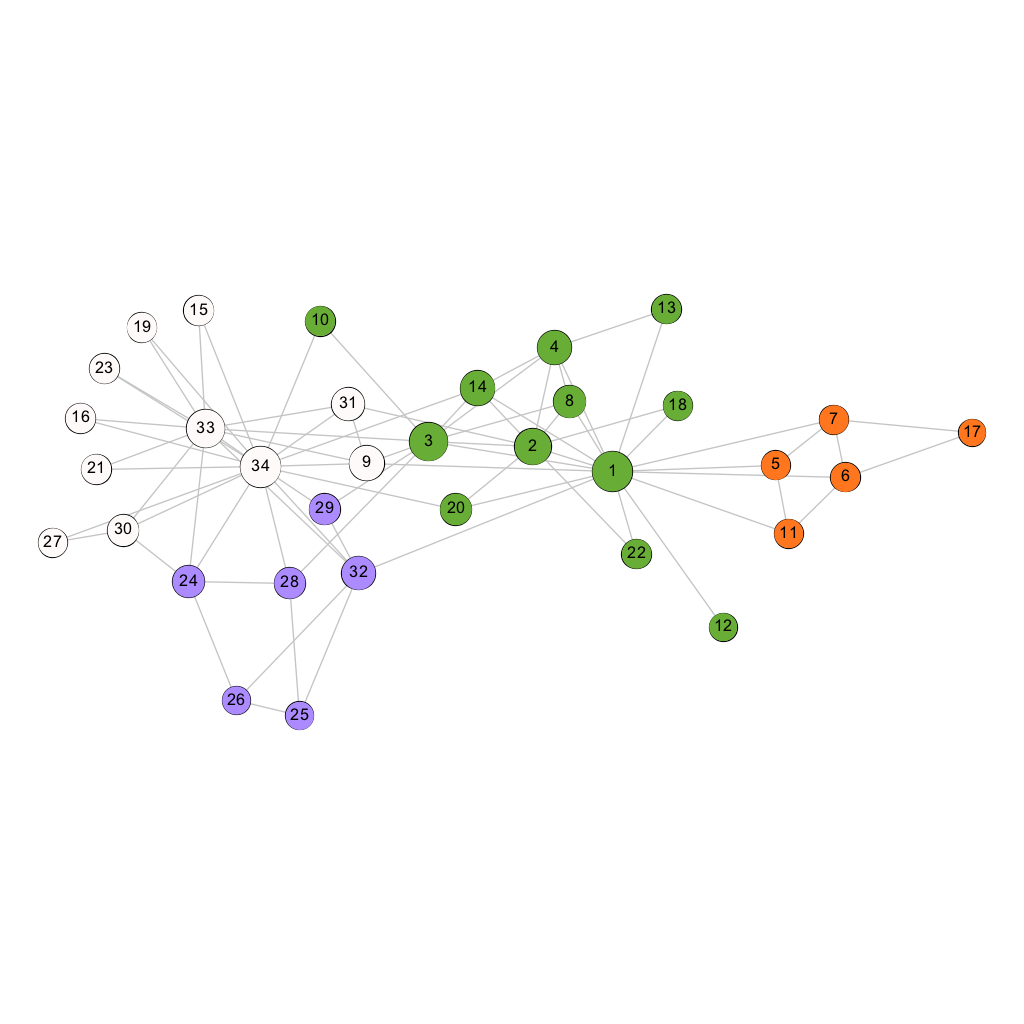

In [5]:
from IPython.display import Image
Image(filename="zacharys-karate-club.png")

Below is the network as presented in *Barabasi* for reference.

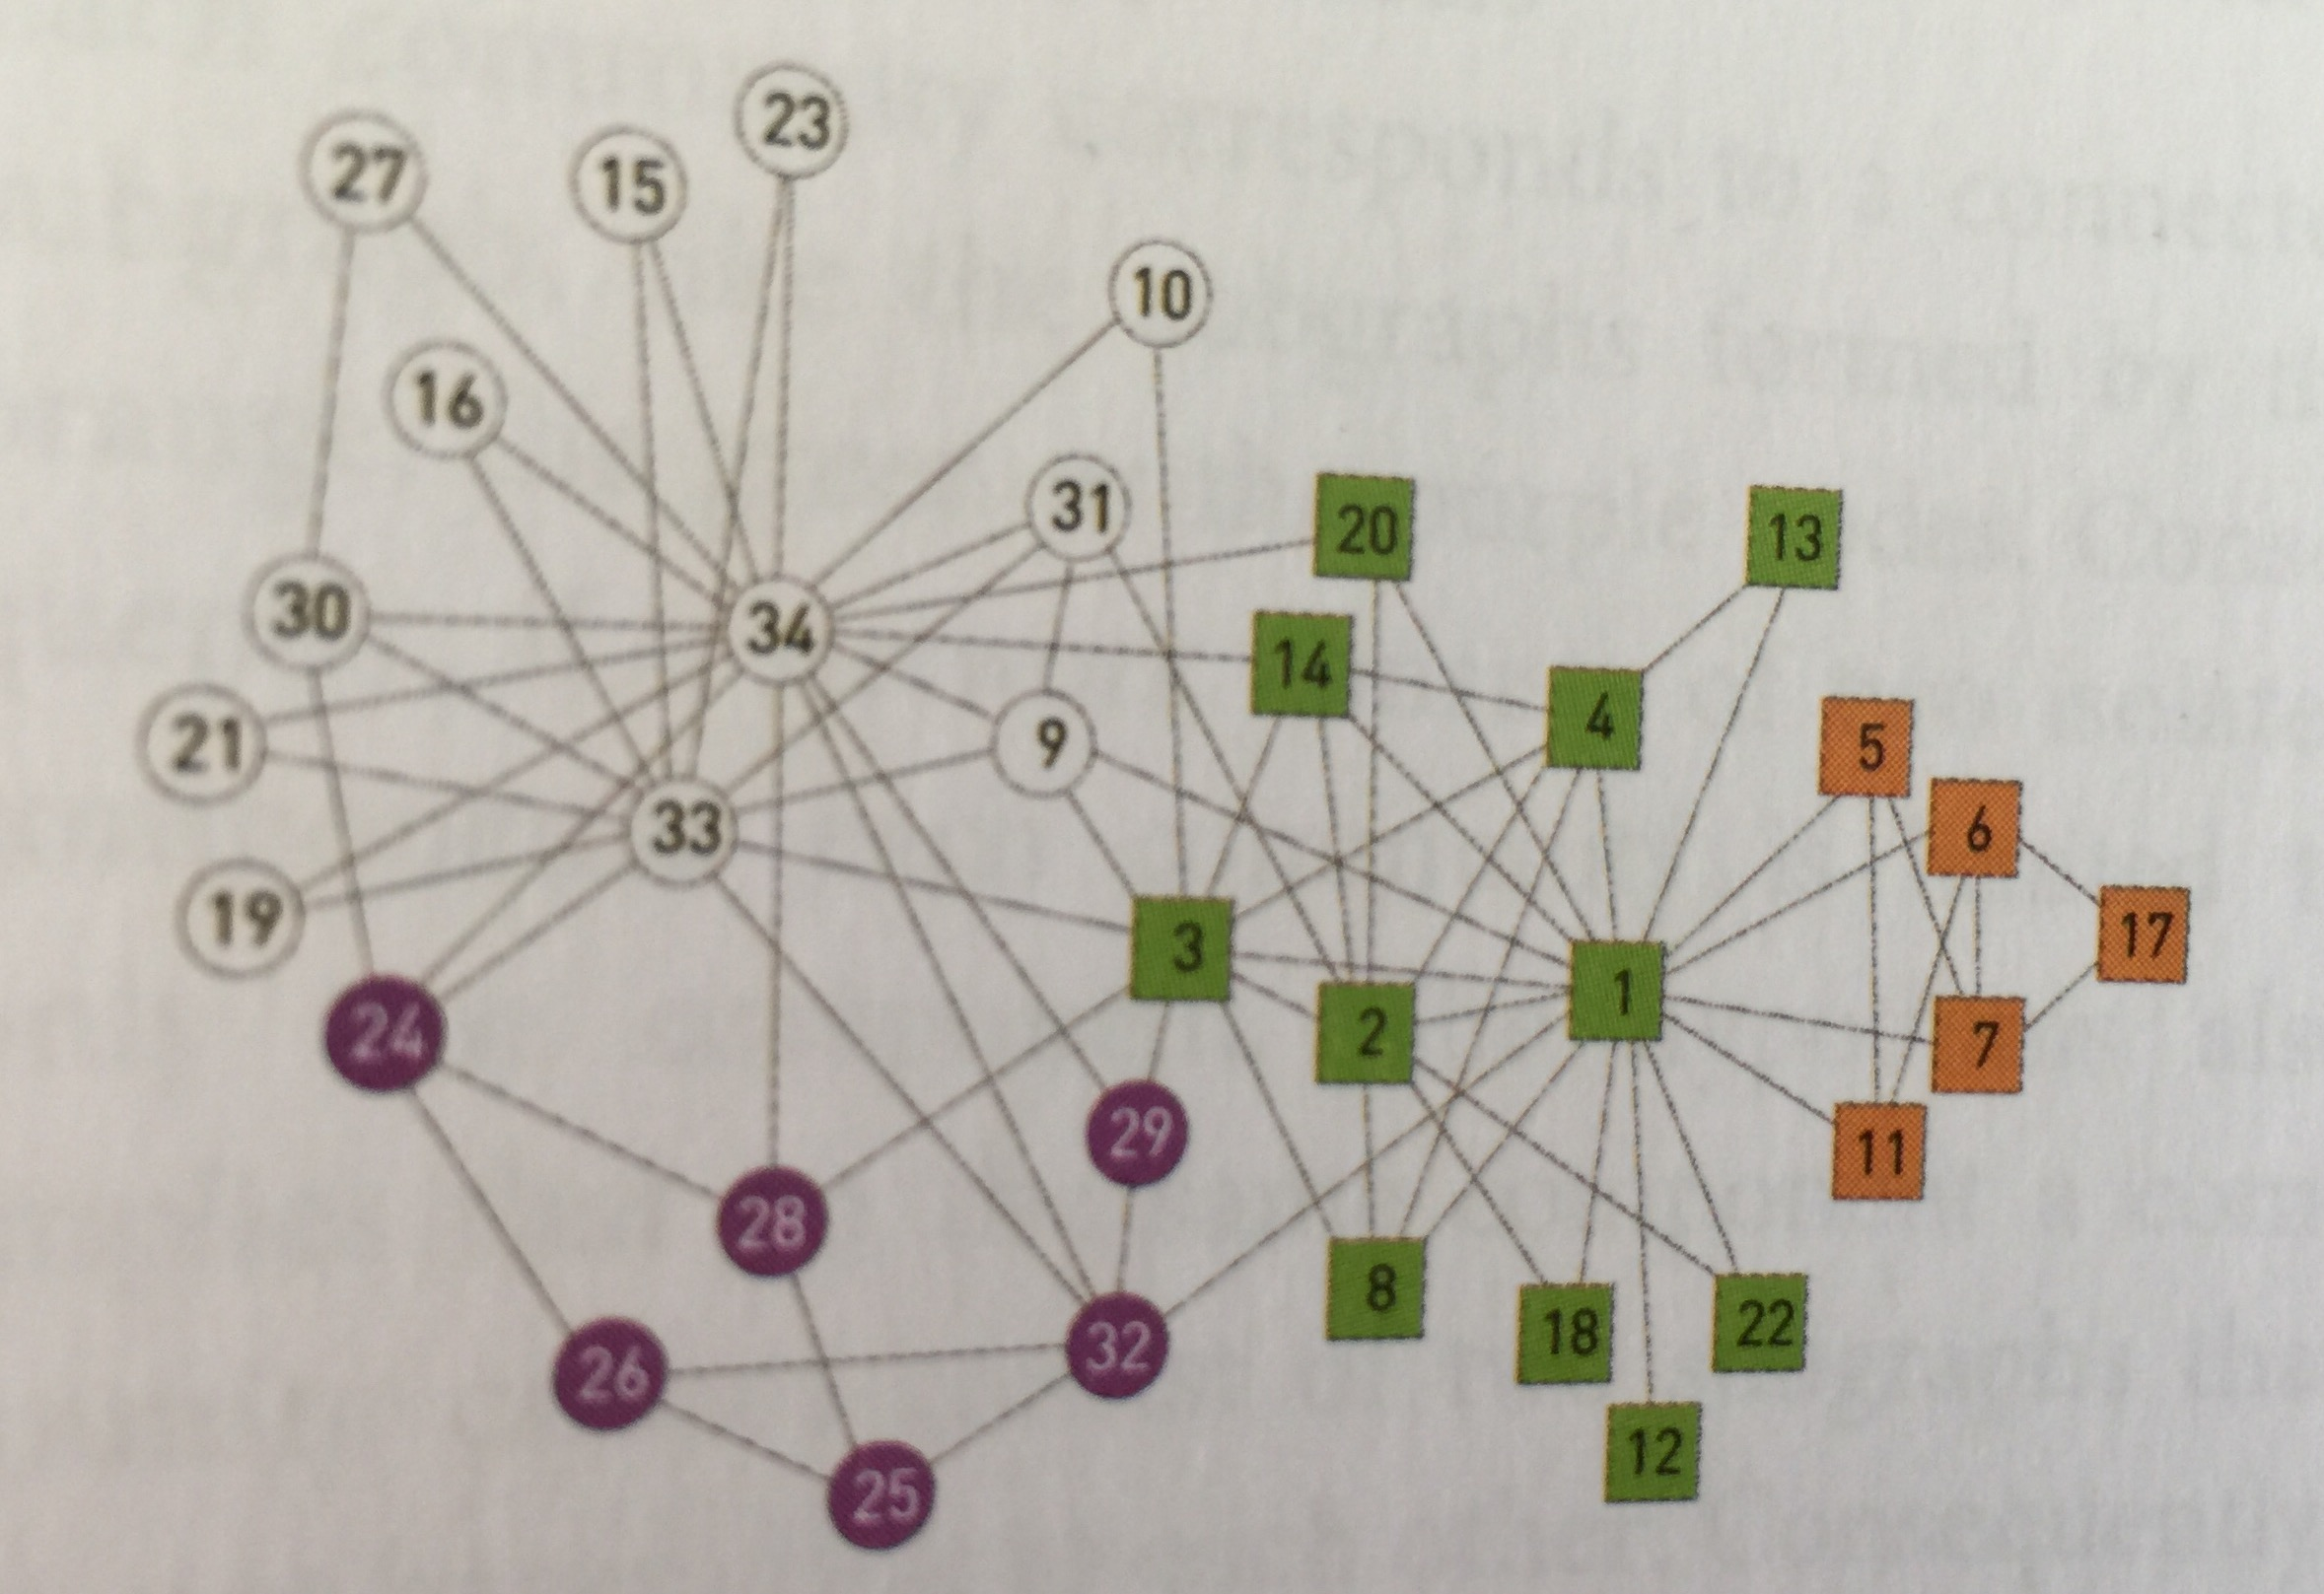

In [6]:
from IPython.display import Image
Image(filename="zacharys-karate-club-barabasi.jpg")